In [153]:
#!pip install numpy

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
 
titanic_data = pd.read_csv('train.csv')
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_rf = RandomForestClassifier()

In [14]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [15]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [16]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [17]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [18]:
best_clf = grid_search_cv_clf.best_estimator_

In [19]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [20]:
best_clf.feature_importances_

array([0.12683928, 0.16148304, 0.04761666, 0.03698087, 0.18941656,
       0.25503267, 0.12591528, 0.02428474, 0.00907473, 0.02335618])

In [21]:
feature_importances = best_clf.feature_importances_

In [28]:
feature_importances_pd = pd.DataFrame({'freatures': list(X_train),
                                      "feature_importances": feature_importances})

feature_importances_pd.sort_values('feature_importances', ascending=False)

,freatures,feature_importances
5,Sex_female,0.255033
4,Fare,0.189417
1,Age,0.161483
0,Pclass,0.126839
6,Sex_male,0.125915
2,SibSp,0.047617
3,Parch,0.036981
7,Embarked_C,0.024285
9,Embarked_S,0.023356
8,Embarked_Q,0.009075


In [31]:
data = pd.read_csv('heart_cleveland_upload.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


<Axes: xlabel='feature_importances', ylabel='features'>

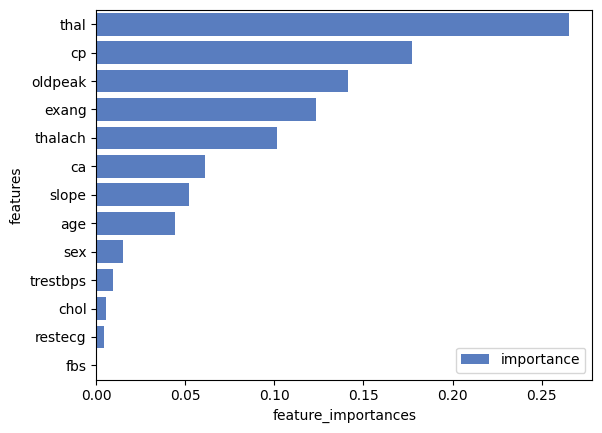

In [37]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

X_train = data.drop('condition', axis=1)
y_train = data.condition
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

feature_importances = grid_search_cv_clf.best_estimator_.feature_importances_

feature_importances_pd = pd.DataFrame({"features": list(X_train),
                                       "feature_importances": feature_importances}).sort_values('feature_importances', ascending=False)

sns.set_color_codes("muted")
sns.barplot(x="feature_importances", y="features", data=feature_importances_pd,
            label="importance", color="b")